# Data Preparation Exercises, Time Series

08 February 2023

Exercises

The end result of this exercise should be a file named prepare.py.  
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [1]:
# imports

import pandas as pd
import numpy as np

from wrangle import acquire_store
import acquire_time_series

import env

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.     Convert date column to datetime format.


In [2]:
shop = acquire_store()

In [3]:
shop.head(2)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.8+ MB


In [5]:
# change 'sale_date' to datetime format

shop['sale_date'] = pd.to_datetime(shop['sale_date'])

In [6]:
# checking to see that it's been updated

print(shop.info())
print()
print(shop.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 48.8+ MB
None

(913000, 7)


### 2. Plot the distribution of sale_amount and item_price.

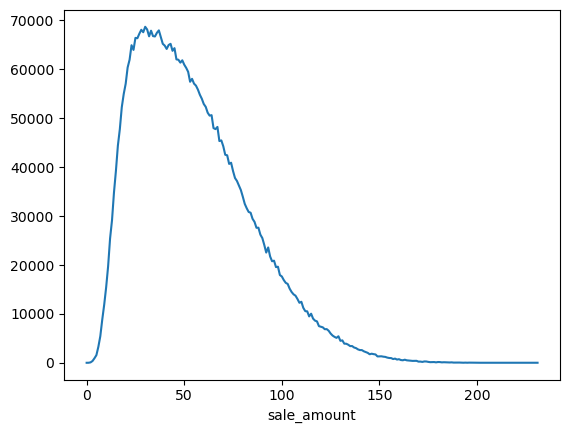

In [7]:
# summed plot

shop.groupby('sale_amount')['item_price'].sum().plot()

plt.show()

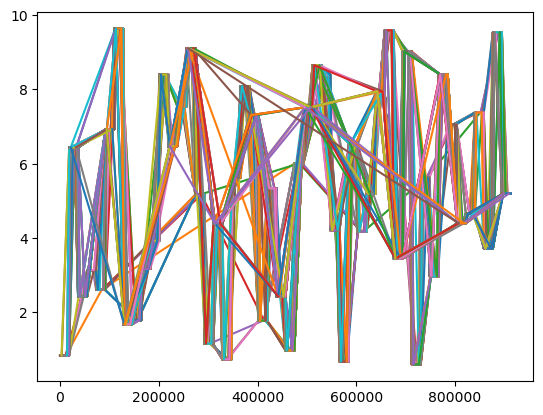

In [8]:
# unsummed plot

shop.groupby('sale_amount')['item_price'].plot()

plt.show()

In [9]:
#sns.histplot(data = shop, x = 'sale_amount')

In [10]:
#sns.histplot(data = shop, x = 'item_price')

### 3.     Set the index to be the datetime variable.

In [11]:
# setting index to now-date-formated 'sale_date'

shop = shop.set_index('sale_date').sort_index()

In [12]:
shop.head(1)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [13]:
# sort dates ascending

shop = shop.sort_index()

### 4.     Add a 'month' and 'day of week' column to your dataframe.


In [40]:
# creating month col

shop['month'] = shop.index.month_name()

In [42]:
# creating day col

shop['day'] = shop.index.day_name()

In [43]:
shop.sample(4)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,
2015-03-01,48,Usda Produce,Plums Black,5.62,12125 Alamo Ranch Pkwy,78253,March,Sunday,269.76
2013-10-06,86,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,2118 Fredericksburg Rdj,78201,October,Sunday,447.20
2016-07-10,57,Amys,Amys Light & Lean Spaghetti Italiano,0.60,15000 San Pedro Ave,78232,July,Sunday,34.20
2016-07-27,46,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,735 SW Military Dr,78221,July,Wednesday,441.14


### 5.    Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [44]:
# multiplying 'sale_amount' by 'item_price' to get 'sales_total'

shop['sales_total'] = shop['sale_amount'] * shop['item_price']

In [45]:
shop.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


### create a function

In [19]:
def grocery_sales_datetime(df):
    
    # change 'sale_date' to datetime format
    df['sale_date'] = pd.to_datetime(df['sale_date'])

    # setting index to now-date-formated 'sale_date'
    df = df.set_index('sale_date')
    
    # sort dates ascending
    shop = shop.sort_index()

    # creating month col
    df['month'] = df.index.month_name()

    # creating day col
    df['day'] = df.index.day_name()

    # multiplying 'sale_amount' by 'item_price' to get 'sales_total'
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

In [20]:
# grocery_sales_datetime(shop)

# function functions, but not for a second time

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following.

    Make sure all the work that you have done above is reproducible. That is, you should put the code into separate functions and be able to re-run the functions and get the same results.


In [48]:
# # acquire_time_series.py

# de_electric = acquire.get_germany_data()

In [49]:
de_electric = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [50]:
de_electric.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
3030,2014-04-19,1146.115,162.251,142.375,304.626
545,2007-06-30,1161.874,NaN,NaN,NaN
1112,2009-01-17,1264.181,NaN,NaN,NaN
1280,2009-07-04,1038.845,NaN,NaN,NaN
2648,2013-04-02,1345.605,122.047,107.823,229.870


In [51]:
de_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [52]:
    # renaming cols
    de_electric = de_electric.rename(columns = {'Date' : 'date', 'Consumption' : 'consumption', 
                               'Wind' : 'wind', 'Solar' : 'solar', 
                               'Wind+Solar' : 'wind_solar'})


### 1. Convert date column to datetime format.

In [53]:
# change 'Date' to datetime format

de_electric['date'] = pd.to_datetime(de_electric['date'])

In [26]:
de_electric.head(1)

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN


### 3. Set the index to be the datetime variable.

In [59]:
# setting index to now-date-formated 'Date'

de_electric = de_electric.set_index('date').sort_index()

### 2. Plot the distribution of each of your variables.

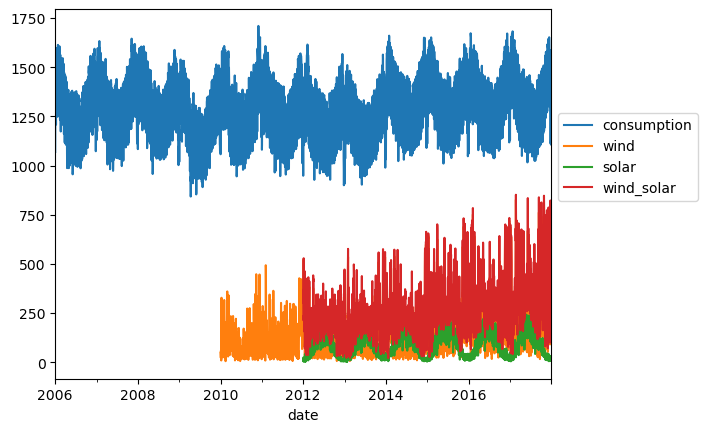

In [60]:
# plotting distro

de_electric.plot()

# placing legend outside
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.6))


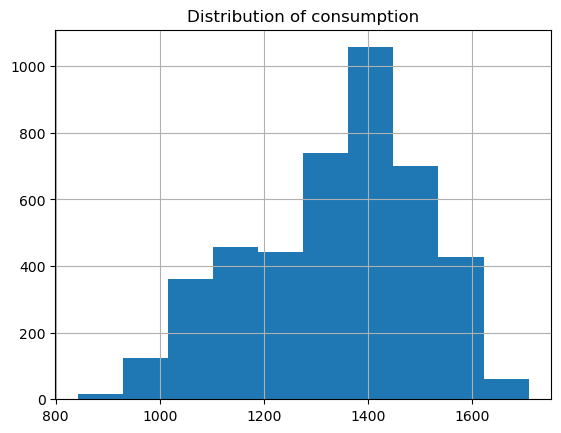

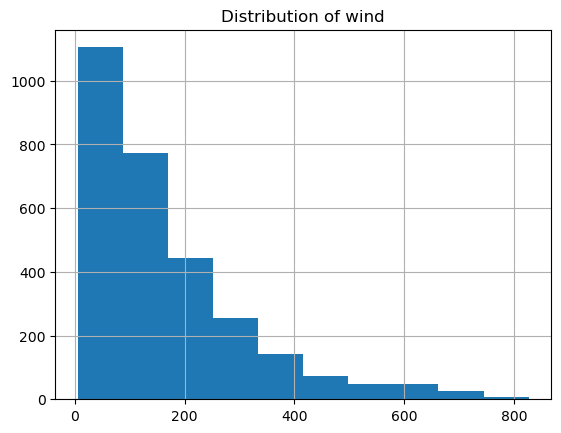

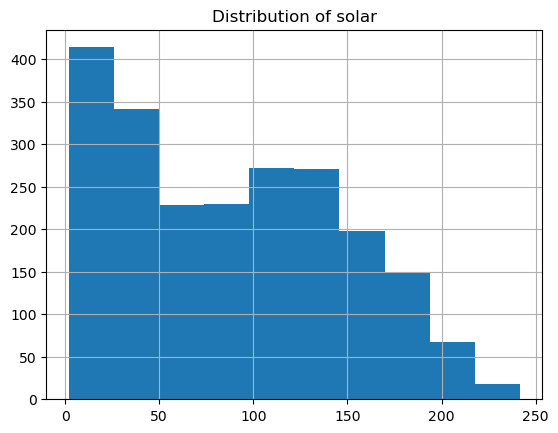

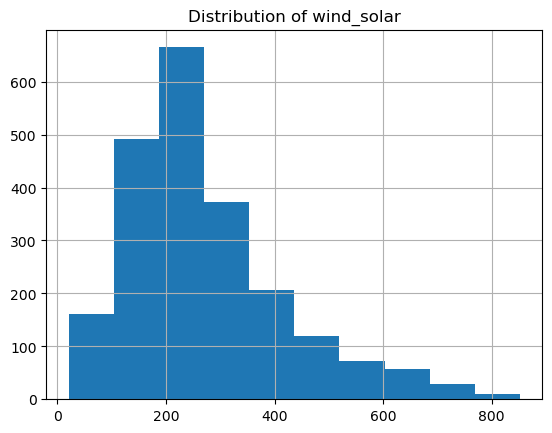

In [61]:
for col in de_electric.columns:
    
    plt.hist(de_electric[col])
    plt.title(f'Distribution of {col}')
    plt.grid()
    plt.show()

### 4. Add a month and a year column to your dataframe.

In [64]:
   # creating month col
de_electric['month'] = de_electric.index.month_name()

de_electric['year'] = de_electric.index.year

In [65]:
de_electric.head(3)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006


### 5. Fill any missing values.

In [66]:
# looking at nulls

de_electric.isna().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [67]:
# filling 'Wind' with 0

de_electric['wind'] = de_electric['wind'].fillna(0)

In [68]:
# filling 'Solar' with 0

de_electric['solar'] = de_electric['solar'].fillna(0)

In [69]:
# filling 'Wind+Solar' with 0

de_electric['wind_solar'] = de_electric['wind_solar'].fillna(0)

In [70]:
# checking for NaN

de_electric.isna().sum()

consumption    0
wind           0
solar          0
wind_solar     0
month          0
year           0
dtype: int64

In [71]:
# alternate instead of each line

de_electric.fillna(0, inplace = True)

In [36]:
# function for the above

def de_electric_time(df):
    
    # renaming cols
    df = df.rename(columns = {'Date' : 'date', 'Consumption' : 'consumption', 
                               'Wind' : 'wind', 'Solar' : 'solar', 
                               'Wind+Solar' : 'wind_solar'})

    # change 'Date' to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # setting index to now-date-formated 'Date'
    df = df.set_index('date')

    # creating month & year cols
    df['month'] = df.index.month_name()
    df['year'] = df.index.year
    
    #filling NaNs with 0
    df.fillna(0, inplace = True)
    
    return df

In [37]:
# de_electric_time(de_electric)

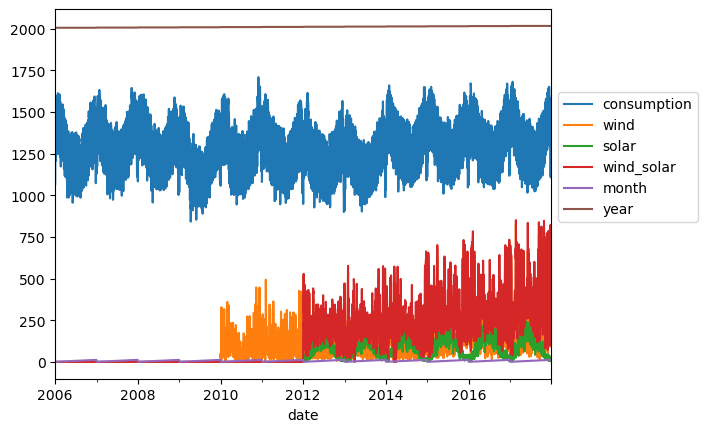

In [38]:
# plotting distro

de_electric.plot()

# placing legend outside
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.6))